# Random Forest for classification of music genre

In [1]:

# Author: Arnova Abdullah
# Date: 14-06-2022
# Description: Code to apply Random Forest machine learning algorithm


## Importing modules

In [2]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix

## Loading data from CSV file

### *Loading data with 10 genre

In [3]:
df = pd.read_csv('data/genre_data_clean.csv')
df.head()
df.shape

(12000, 20)

### *Loading data with 6 genre

In [4]:
df_7 = pd.read_csv('data/genre_data_clean2.csv')
df_7.head()
df_7.shape

(7200, 20)

## Feature Column of datasets

There are 21 columns in the dataset. Below is a list of all the columns.

In [5]:
# Dataset with 10 genre
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'year', 'genre'],
      dtype='object')

In [6]:
# Dataset with 6 genre
df_7.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'year', 'genre'],
      dtype='object')

It can be identified that the following columns have no significance in training a machine learning mode:

1. `type`
2. `id`
3. `uri`
4. `track_href`
5. `analysis_url`
6. `year`
7. `duration_ms`


Therefore, these columns are dropped from the dataset.

In [7]:
# Dropping unnecessary features from dataset with 10 genre
df.drop(
    ['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'year'], 
    axis=1, 
    inplace=True
) 
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,4,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,3,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,4,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,4,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,4,acoustic


In [8]:
# Dropping unnecessary features from dataset with 6 genre
df_7.drop(
    ['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'year'], 
    axis=1, 
    inplace=True
) 
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,4,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,3,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,4,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,4,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,4,acoustic


## Correlation Matrix

<AxesSubplot:>

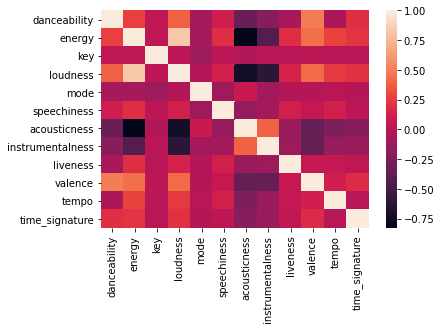

In [9]:
# Correlation matrix for dataset with 10 genre
sns.heatmap(df.corr(method = 'pearson'))

<AxesSubplot:>

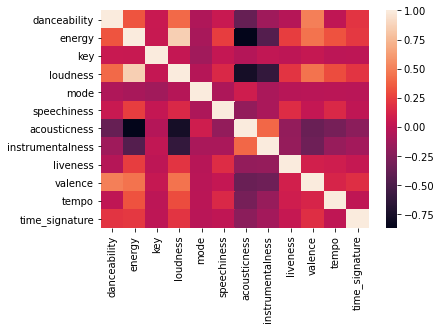

In [10]:
# Correlation matrix for dataset with 6 genre
sns.heatmap(df_7.corr(method = 'pearson'))

* Though there are some strong correlation between some features, we are keeping all the features. One of the reasons are removing feature decreases accuracy. Because this dataset is not perfect for recognizing genre.

## Importing modules for train test splitting and label encoding

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt

## Encoding genre column of dataset with 10 genre

In [12]:
le = preprocessing.LabelEncoder()
df["genre"] = le.fit_transform(df["genre"])
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,4,0
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,3,0
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,4,0
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,4,0
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,4,0


## Encoding genre column of dataset with 6 genre

In [13]:
le = preprocessing.LabelEncoder()
df_7["genre"] = le.fit_transform(df_7["genre"])
df_7.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,4,0
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,3,0
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,4,0
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,4,0
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,4,0


## Encoding 'key', 'mode', 'time_signature' for both datasets

### Importing module for encoding with one hot encoder

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [15]:
# Encoding dataset with 10 genre
y = df["genre"]
df_OneHot = df.loc[:,("time_signature","mode", "key")]
enc = OneHotEncoder()
enc.fit(df_OneHot)
onehotlabels = enc.transform(df_OneHot).toarray()

df_scaled = df.drop(["genre","time_signature","mode", "key"], axis=1)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = np.append(df_scaled,onehotlabels,axis=1)
df_scaled.shape

(12000, 28)

In [16]:
# Encoding dataset with 6 genre
y_7 = df_7["genre"]
df_7_OneHot = df_7.loc[:,("time_signature","mode", "key")]
enc = OneHotEncoder()
enc.fit(df_7_OneHot)
onehotlabels = enc.transform(df_7_OneHot).toarray()

df_scaled_7 = df_7.drop(["genre","time_signature","mode", "key"], axis=1)
scaler = MinMaxScaler()
df_scaled_7 = scaler.fit_transform(df_scaled_7)
df_scaled_7 = np.append(df_scaled_7,onehotlabels,axis=1)
df_scaled_7.shape

(7200, 28)

## Train - Test Splitting

In [17]:
# Train test splitting for dataset with 10 genres
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, stratify=y, test_size=1/6, random_state=42)

In [18]:
X_test.shape
X_train.shape

(10000, 28)

In [19]:
# Train test splitting for dataset with 6 genres
from sklearn.model_selection import train_test_split
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(df_scaled_7, y_7, stratify=y_7, test_size=1/6, random_state=42)

In [20]:
X_train_7.shape
X_test_7.shape

(1200, 28)

## Random Forest model training

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

### Genre list for dataset with 10 genre

In [22]:
class_names = ['acoustic', 'blues', 'classical', 'dance', 'jazz','latin', 'metal', 'pop', 'rock', 'techno']

### Genre list for dataset with 6 genre

In [23]:
class_names_7 = ['acoustic', 'classical', 'jazz', 'metal', 'rock','tecno']

### Random forest model to classify 10 genre

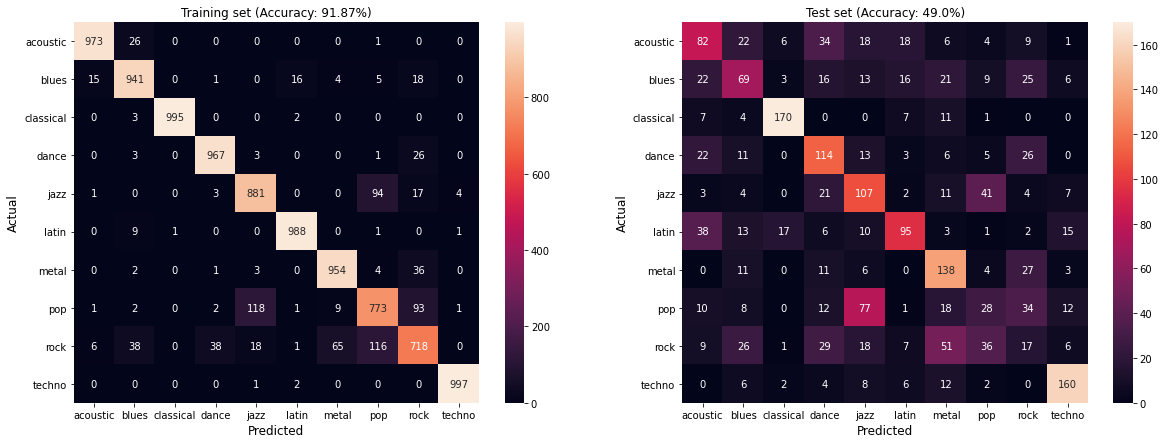

In [24]:
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())
fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (20, 7))

# Training set
y_train_pred = model.predict (X_train)
train_accuracy = accuracy_score (y_true = y_train, y_pred = y_train_pred)
sns.heatmap (confusion_matrix(y_train, y_train_pred), annot = True, fmt = 'd', yticklabels = class_names, xticklabels = class_names, ax = ax1)
ax1.set_title (f'Training set (Accuracy: {round(train_accuracy*100, 2)}%)')
ax1.set_xlabel ('Predicted' , fontsize = 12)
ax1.set_ylabel ('Actual', fontsize = 12);

# Test set
y_test_pred = model.predict (X_test)
train_accuracy = accuracy_score (y_true = y_test, y_pred = y_test_pred)
sns.heatmap (confusion_matrix(y_test, y_test_pred), annot = True, fmt = 'd', yticklabels = class_names, xticklabels = class_names, ax = ax2)
ax2.set_title (f'Test set (Accuracy: {round(train_accuracy*100, 2)}%)')
ax2.set_xlabel ('Predicted' , fontsize = 12)
ax2.set_ylabel ('Actual', fontsize = 12);


* Random Forest can predict 10 genre with 91.87% accuracy on training set, so it is overfitted. Test set accuracy is only 49%. We need to do cross validation and hyperparameter tuning.

### Random forest model to classify 6 genre

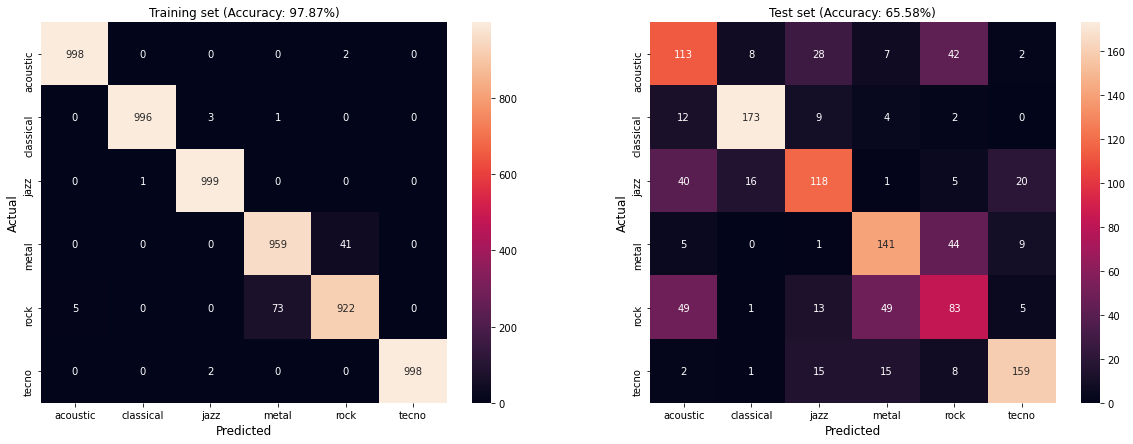

In [33]:
model_7 = RandomForestClassifier()
model_7.fit(X_train_7, y_train_7.values.ravel())
fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (20, 7))

# Training set
y_train_pred_7 = model_7.predict (X_train_7)
train_accuracy_7 = accuracy_score (y_true = y_train_7, y_pred = y_train_pred_7)
sns.heatmap (confusion_matrix(y_train_7, y_train_pred_7), annot = True, fmt = 'd', yticklabels = class_names_7, xticklabels = class_names_7, ax = ax1)
ax1.set_title (f'Training set (Accuracy: {round(train_accuracy_7*100, 2)}%)')
ax1.set_xlabel ('Predicted' , fontsize = 12)
ax1.set_ylabel ('Actual', fontsize = 12);

# Test set
y_test_pred_7 = model_7.predict (X_test_7)
train_accuracy_7 = accuracy_score (y_true = y_test_7, y_pred = y_test_pred_7)
sns.heatmap (confusion_matrix(y_test_7, y_test_pred_7), annot = True, fmt = 'd', yticklabels = class_names_7, xticklabels = class_names_7, ax = ax2)
ax2.set_title (f'Test set (Accuracy: {round(train_accuracy_7*100, 2)}%)')
ax2.set_xlabel ('Predicted' , fontsize = 12)
ax2.set_ylabel ('Actual', fontsize = 12);

* Random Forest can predict 6 genre with 97.87% accuracy on training set, so it is overfitted. Test set accuracy is now 65.58%. We need to do cross validation and hyperparameter tuning.

## Cross validation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [28]:
cv = StratifiedKFold (3, shuffle = True, random_state = 42)
scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [30]:
# Cross validation score for classifying 10 genres
cross_val_score(model, X_train, y_train, cv = 3, n_jobs = -1)

array([0.47540492, 0.47554755, 0.48124812])

In [31]:
# Cross validation score for classifying 6 genres
cross_val_score(model_7, X_train_7, y_train_7, cv = 3, n_jobs = -1)

array([0.6535, 0.662 , 0.635 ])

## Grid Search for hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import time

### Hyperparameter tuning for dataset with 10 genre

In [58]:
params_grid = {'n_estimators': [150, 200, 250, 300],
    'max_features': ["sqrt"],
    'max_depth': [20, 26, 32, 38],
    'min_samples_split': [7, 10, 13, 16],
    'min_samples_leaf': [7, 10, 13, 16]}
grid_search = GridSearchCV(model, params_grid, cv=KFold(10, random_state=42, shuffle=True), verbose=3, n_jobs=-1, scoring='accuracy')
start_time = time.time()
grid_search.fit (X_train, y_train.values.ravel())
# computation time
comp_time_gs = time.time() - start_time
print("--- Computation time for grid search: %s seconds ---" % comp_time_gs)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
--- Computation time for grid search: 1556.0525088310242 seconds ---


### Hyperparameter tuning for dataset with 6 genre

In [68]:
params_grid = {'n_estimators': [150, 200, 250, 300],
    'max_features': ["sqrt"],
    'max_depth': [20, 26, 32, 38],
    'min_samples_split': [7, 10, 13, 16],
    'min_samples_leaf': [7, 10, 13, 16]}
grid_search_7 = GridSearchCV(model_7, params_grid, cv=KFold(10, random_state=42, shuffle=True), verbose=3, n_jobs=-1, scoring='accuracy')
start_time = time.time()
grid_search_7.fit (X_train_7, y_train_7.values.ravel())
# computation time
comp_time_gs = time.time() - start_time
print("--- Computation time for grid search: %s seconds ---" % comp_time_gs)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
--- Computation time for grid search: 839.3053607940674 seconds ---


*Computing time is higher for Grid search hyperparameter tuning

## Best parameter and best score for dataset with 10 genre

In [59]:
grid_search.best_params_

{'max_depth': 32,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 16,
 'n_estimators': 300}

In [60]:
grid_search.best_score_

0.49269999999999997

## Best parameter and best score for dataset with 6 genre

In [69]:
grid_search_7.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 13,
 'n_estimators': 300}

In [70]:
grid_search_7.best_score_

0.6481666666666668

## After Crossvalidation and hyperparameter tuning, test set accuracy

### Test set accuracy for classifying 10 genre

In [61]:
predictions_gs = grid_search.best_estimator_.predict(X_test)
test_accuracy_gs = accuracy_score(y_test, predictions_gs)
print(f'Test set Accuracy: {round(test_accuracy_gs, 4)*100}%.')

Test set Accuracy: 49.7%.


### Test set accuracy for classifying 6 genre

In [71]:
predictions_gs_7 = grid_search_7.best_estimator_.predict(X_test_7)
test_accuracy_gs_7 = accuracy_score(y_test_7, predictions_gs_7)
print(f'Test set Accuracy: {round(test_accuracy_gs_7, 4)*100}%.')

Test set Accuracy: 65.75%.


* Some genres are correlated like 'pop' and 'dance'. While classifying these correlated genre, accuracy decreases. Dataset from spotify is not proper for classifying music genre. So classifying 6 genre gives better accuracy instead of classifying 10 genre. 